## Import libraries

In [ ]:

import pandas as pd
import datetime as dt

# Visualization libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Transformer model
from transformers import pipeline

## Import Reddit data

The data contains the top posts from 3 subreddits: Datascience, MachineLearning and Artificial Intelligence

In [ ]:

##Load Data and Overview:
-----------------------
#Load datasets containing posts and comments from specified CSV files.
#Calculate the total number of posts, total number of comments, and the count of unique subreddits.
#Create an interactive figure showing the total posts, total comments, and total subreddits using Plotly.

# Load data
posts_df = pd.read_csv('/content/DS_ML_AI_posts.csv')
comments_df = pd.read_csv('/content/DS_ML_AI_comments.csv')

# Number of observations - for metric cells
number_of_posts = posts_df.shape[0]
number_of_comments = comments_df.shape[0]
count_subreddits = posts_df['subreddit'].nunique()

In [ ]:

import plotly.graph_objects as go


In [ ]:
# Create Plotly figure for number indicators
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode="number",
    value=number_of_posts,
    title={"text": "<span style='font-size:1.5em; color:black'>Total Posts</span>"},
     domain={'x': [0, 0.33], 'y': [0, 1]}
))

fig.add_trace(go.Indicator(
    mode="number",
    value=number_of_comments,
    title={"text": "<span style='font-size:1.5em; color:black'>Total Comments</span>"},
    domain={'x': [0.33, 0.66], 'y': [0, 1]}
))

fig.add_trace(go.Indicator(
    mode="number",
    value=count_subreddits,
    title={"text": "<span style='font-size:1.5em; color:black'>Total Subreddits</span>"},
    domain={'x': [0.66, 1], 'y': [0, 1]}
))

fig.show()

In [ ]:

#Data Preprocessing:
-------------------
#Convert the 'created_utc' column to normal datetime format.
#Extract the year from the 'created_date' and create a new 'created_year' column.
#Merge posts with their comments using the 'post_id' column as the key.
#Remove rows with missing comments in the merged dataset.


In [ ]:
# Convert created date to normal datetime
posts_df['created_date'] = posts_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
posts_df['created_year'] = posts_df['created_date'].dt.year
posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7770,186,0.99,2020-05-10 13:19:54,2020
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,5838,133,0.98,2021-01-10 10:30:36,2021
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4749,111,0.97,2020-04-25 04:27:23,2020
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4677,230,0.97,2021-02-28 15:12:28,2021
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4547,228,0.95,2021-07-11 04:18:59,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2982,w9mdys,datascience,1.658947e+09,NaN,https://www.infoworld.com/article/3668252/rstu...,"RStudio changes name to Posit, expands focus t...",Tooling,234,58,0.99,2022-07-27 18:37:24,2022
2983,uehn2c,datascience,1.651223e+09,I started my DS career around 7 years ago and ...,https://www.reddit.com/r/datascience/comments/...,How loyal should I be to my former employer/team?,Job Search,229,50,0.95,2022-04-29 08:55:48,2022
2984,isl56d,datascience,1.600091e+09,"I've seen the statement ""It's easier to teach ...",https://www.reddit.com/r/datascience/comments/...,"""It's easier to teach coding to mathematicians...",Discussion,234,78,0.97,2020-09-14 13:46:13,2020
2985,7yw6x3,datascience,1.519136e+09,NaN,https://blog.jupyter.org/jupyterlab-is-ready-f...,JupyterLab is Ready for Users,Tooling,235,35,0.97,2018-02-20 14:19:09,2018


In [ ]:
# Merge posts with their comments
comments_posts_df = posts_df.merge(comments_df, on='post_id', how='left')

# Remove rows with missing comments
comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

# EDA

In [ ]:
#Exploratory Data Analysis (EDA) and Visualization:
-------------------------------------------------
#Perform EDA on the 'posts_df' DataFrame.
#Group by year and subreddit, count the number of posts, and create a grouped bar plot using Plotly Express.
#Generate a word cloud for post titles in a selected year.

In [ ]:
posts_df

In [ ]:
# Group by year and subreddit and count the number of posts
year_subreddit_counts = posts_df.groupby(['created_year', 'subreddit'])['post_id'].count().reset_index(name='num_posts')

# Create grouped bar plot
fig = px.bar(year_subreddit_counts, x='created_year', y='num_posts', color='subreddit',
             title='Number of Posts for Each Subreddit in Each Year')

# Update layout
fig.update_layout(
    xaxis_title='Subreddit',
    yaxis_title='Number of Posts',
    legend_title='Subreddit',
    height=400
)

# Show the plot
fig.show()

 * There is a popularity shift from machine learning to data science may indicate evolving trends or increased interest in specific aspects of the field over time

 * A significant uptick in discussions across all topics from 2019 to 2022 may domain due to the advancement in the domain




## 🌤 Wordcloud of post titles by year

**Explore the popular mentions in each year**

In [ ]:
# Generate a word cloud for post titles in a selected year
selected_year = 2022

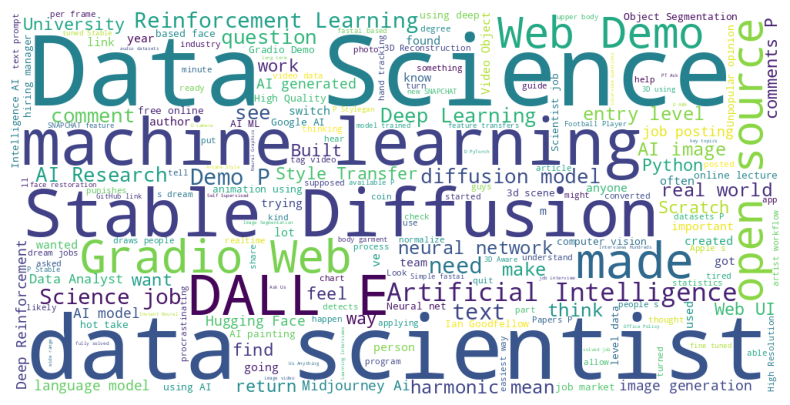

In [ ]:
posts_in_year = posts_df[posts_df['created_year'] == selected_year]
post_title_text_year = ' '.join(item for item in posts_in_year[~posts_in_year['post_title'].isna()]['post_title'])

word_cloud = WordCloud(collocation_threshold = 2, width=1000, height=500,
                        background_color = 'white',
                    ).generate(post_title_text_year)

# Display the generated Word Cloud
plt.figure( figsize=(10,5) )
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

## Sentiment analysis for mentions

In [ ]:
# Sentiment Analysis:
-------------------
# Filter comments related to 'chatgpt'.
# Utilize a pre-trained sentiment analysis model from Hugging Face to classify sentiments.
# Create a bar chart to visualize the sentiment distribution of the filtered comments.

In [ ]:

word_input = "chatgpt"

In [ ]:
comments_posts_df_sub = comments_posts_df[comments_posts_df['post_title'].str.contains(word_input)]
comments_posts_df_sub

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
97310,1174kud,artificial,1.676893e+09,NaN,https://i.redd.it/g6c8lxiygdja1.jpg,"fine, let's just get chatgpt cancelled💀",News,252,54,0.79,2023-02-20 11:42:57,2023,How many time has this picture been screen cap...
97311,1174kud,artificial,1.676893e+09,NaN,https://i.redd.it/g6c8lxiygdja1.jpg,"fine, let's just get chatgpt cancelled💀",News,252,54,0.79,2023-02-20 11:42:57,2023,Unbased gpt
97312,1174kud,artificial,1.676893e+09,NaN,https://i.redd.it/g6c8lxiygdja1.jpg,"fine, let's just get chatgpt cancelled💀",News,252,54,0.79,2023-02-20 11:42:57,2023,THIS IS BRAND NEW INFORMATION
97313,1174kud,artificial,1.676893e+09,NaN,https://i.redd.it/g6c8lxiygdja1.jpg,"fine, let's just get chatgpt cancelled💀",News,252,54,0.79,2023-02-20 11:42:57,2023,Here’s some actual data on cgpt bias for anyon...
97314,1174kud,artificial,1.676893e+09,NaN,https://i.redd.it/g6c8lxiygdja1.jpg,"fine, let's just get chatgpt cancelled💀",News,252,54,0.79,2023-02-20 11:42:57,2023,This ethical censorship bs just needs to go al...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108261,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,104,18,0.93,2023-01-06 07:25:29,2023,"it would probably be able to do that, its a bi..."
108262,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,104,18,0.93,2023-01-06 07:25:29,2023,"You.com is built on GPT, so not exactly a comp..."
108263,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,104,18,0.93,2023-01-06 07:25:29,2023,interesitng thanks ill check it out.\n\nwhats ...
108264,104nxq2,artificial,1.672990e+09,"after using chatgpt for a couple of weeks, ive...",https://www.reddit.com/r/artificial/comments/1...,chatgpt has massively improved my productivity...,Question,104,18,0.93,2023-01-06 07:25:29,2023,For me it has been a game changer. Keep in min...


In [ ]:
## Sentiment analyzer from Hugging face
sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

In [ ]:
def get_sentiment(text):
    # Get sentiment prediction scores
    try:
        sentiment = sentiment_classifier(text)[0]['label']
    except:
        sentiment = 'Not classified'

    return sentiment

In [ ]:
# Calculate sentiment for each comment
comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))
comments_posts_df_sub

## Analyzing sentiment

In [ ]:
sentiment_counts = comments_posts_df_sub.groupby('sentiment')['post_id'].count().reset_index(name='num_posts')
# Create bar chart with Plotly Express

fig = px.bar(sentiment_counts, x='sentiment',color='sentiment', y='num_posts', title='Sentiment Distribution')

# Update layout
fig.update_layout(
    xaxis_title='Sentiment',
    yaxis_title='Count',
)

# Show the plot
fig.show()

- The Negative and neutral sentiment for chatgpt shows discussions related to the analyzed topics on Reddit tend to be more analytical, critical, or potentially touch upon challenges concerns
- Topics are inclined towards sharing information, asking questions, or expressing skepticism rather than overwhelmingly expressing positive emotions

## Emotion recognition

In [ ]:
# Emotion Analysis:
-----------------
# Utilize a pre-trained emotion analysis model from Hugging Face to classify emotions.
# Create a bar chart to visualize the emotion distribution of the filtered comments.

In [ ]:
# Emotion analyzer from Hugging face
emotion_classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

In [ ]:
def get_emotion(text):
    # Get emotion prediction scores
    pred_scores = emotion_classifier(text)

    # Get emotion with highest prediction score
    emotion = max(pred_scores[0], key=lambda x: x['score'])['label']

    return emotion

In [ ]:
comments_posts_df_sub['emotion'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_emotion(x))
comments_posts_df_sub

## Analyzing emotion over the commments

In [ ]:
emotion_counts = comments_posts_df_sub.groupby('emotion')['post_id'].count().reset_index(name='num_posts')
# Set up parameters for the bar chart

fig = px.bar(emotion_counts, x='emotion',color='emotion', y='num_posts', title='Sentiment Distribution')

# Update layout
fig.update_layout(
    xaxis_title='Emotion',
    yaxis_title='Count',
)

# Show the plot
fig.show()



*   The higher joy indicates a supportive and enthusiastic community
*  There are discussions, particularly those related to payments and alternatives, hints at potential challenges faced by the community



In [ ]:
# All comments for chatgpt comes from two users posts
comments_posts_df_sub['post_id'].unique()

array(['1174kud', '104nxq2'], dtype=object)

In [ ]:
# Filtering the posts
comments_posts_df_sub[comments_posts_df_sub['emotion'] == 'anger']


*Hate Speech Analysis*

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
hate_speech = pipeline("text-classification", model="facebook/roberta-hate-speech-dynabench-r4-target")

In [ ]:
def hate_sp(text):
    # Get emotion prediction scores
    pred_scores = hate_speech(text)

    # Get emotion with highest prediction score
    hate_or_not = max(pred_scores,key=lambda x: x['score'])['label']

    return hate_or_not

In [ ]:
comments_posts_df_sub['hate_speech'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: hate_sp(x))
comments_posts_df_sub

In [ ]:
hate_speech = comments_posts_df_sub.groupby('hate_speech')['post_id'].count().reset_index(name='num_posts')
# Set up parameters for the bar chart

fig = px.bar(hate_speech, x='hate_speech',color='hate_speech', y='num_posts', title='Hate Speach Distribution')

# Update layout
fig.update_layout(
    xaxis_title='Hate Speach',
    yaxis_title='Count',
)

# Show the plot
fig.show()



*    Indicates a relatively low incidence of posts tagged as hate speech, with the majority categorized as non-hateful.



In [ ]:
#END